**Topic :** ECG Signal Analysis using Python

*   **Name :** Sanjaykumar Parmar
*   **Subject :** Digital Signal Processing
*   **Semester :** 5
*   **Stream :** Electronics and Communication Engineering
*   **College :** Nirma University, Ahmedabad

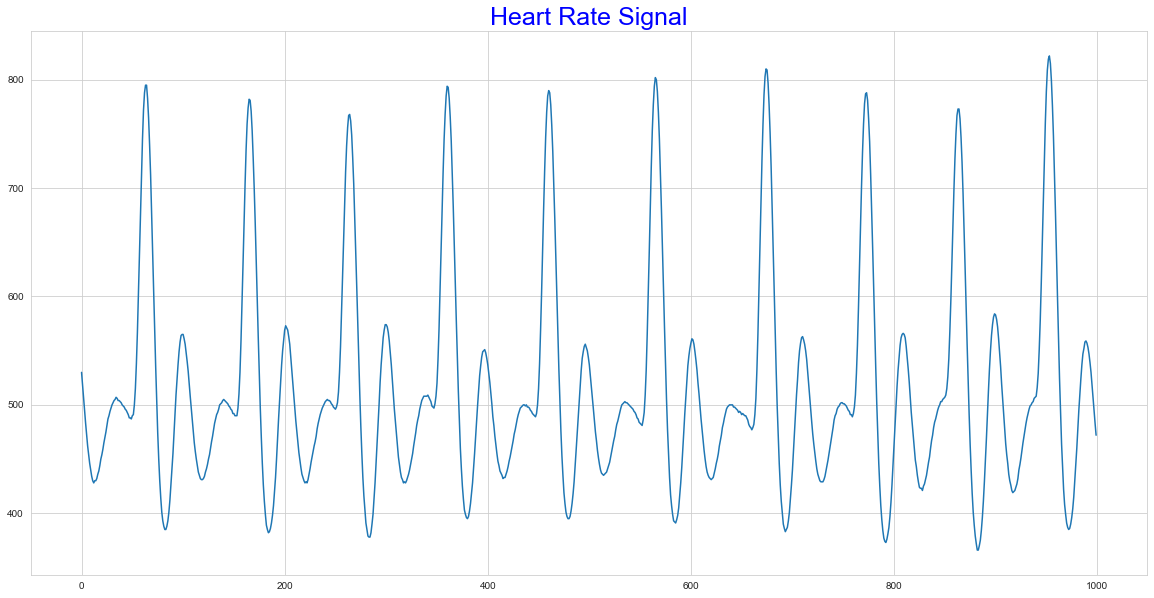

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("data.csv") #Read data from CSV datafile

%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 10.0]  # Bigger figures
sns.set_style("whitegrid")  # White background

plt.title("Heart Rate Signal",size=25,color='b') #The title of our plot
plt.plot(dataset.hart[:1000]) #Draw the plot object
plt.show() #Display the plot

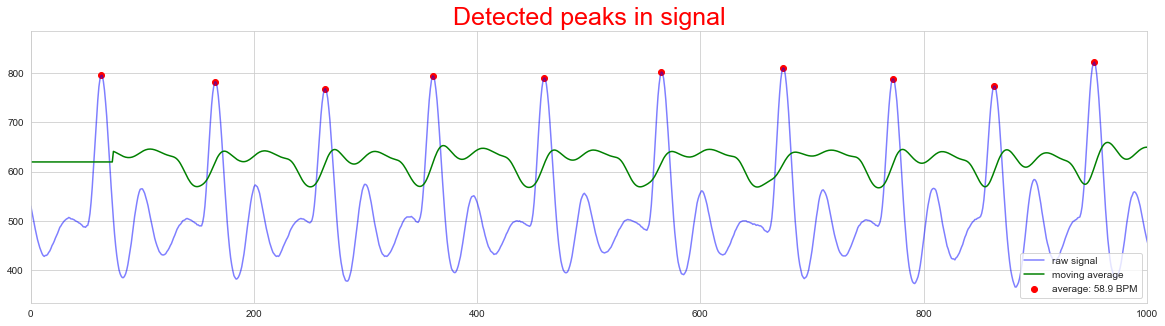

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv("data.csv")

#Calculate moving average with 0.75s in both directions, then append do dataset
hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
fs = 100 #The example dataset was recorded at 100Hz

mov_avg = dataset['hart'].rolling(int(hrw*fs)).mean() #Calculate moving average
#Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
avg_hr = (np.mean(dataset.hart[:1000]))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.2 for x in mov_avg] 
dataset['hart_rollingmean'] = mov_avg #Append the moving average to the dataframe

#Mark regions of interest
window = []
peaklist = []
listpos = 0 #We use a counter to move over the different data columns



for datapoint in dataset.hart:
    rollingmean = dataset.hart_rollingmean[listpos] #Get local mean
    if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1
    elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
        window.append(datapoint)
        listpos += 1
    else: #If signal drops below local mean -> determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
        peaklist.append(beatposition) #Add detected peak to list
        window = [] #Clear marked ROI
        listpos += 1

ybeat = [dataset.hart[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes

plt.title("Detected peaks in signal",size=25, color='red')
plt.xlim(0,1000)
plt.plot(dataset.hart, alpha=0.5, color='blue', label="raw signal") #Plot semi-transparent HR
plt.plot(mov_avg, color ='green', label="moving average") #Plot moving average
plt.scatter(peaklist, ybeat, color='red', label="average: %.1f BPM" %bpm) #Plot detected peaks
plt.legend(loc=4, framealpha=0.8)
plt.show()

In [ ]:
RR_list = []
cnt = 0

while (cnt < (len(peaklist)-1)):
    RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
    ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
    RR_list.append(ms_dist) #Append to list
    cnt += 1

bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
print("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print

Average Heart Beat is: 58.9


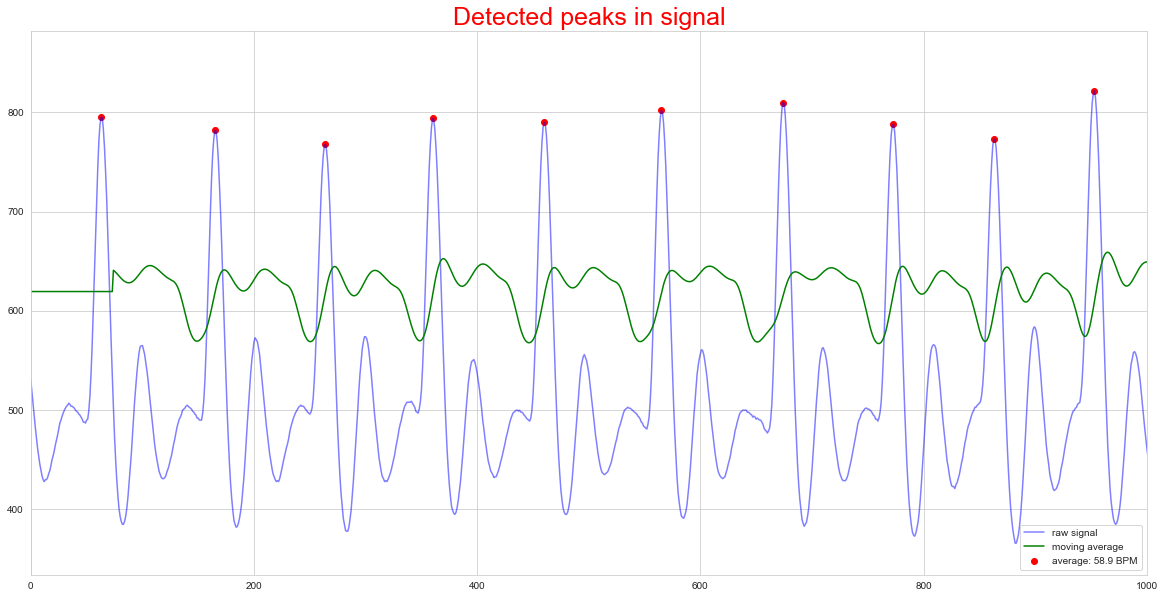

In [ ]:
plt.title("Detected peaks in signal",size=25, color='red')
plt.xlim(0,1000)
plt.plot(dataset.hart, alpha=0.5, color='blue', label="raw signal") #Plot semi-transparent HR
plt.plot(mov_avg, color ='green', label="moving average") #Plot moving average
plt.scatter(peaklist, ybeat, color='red', label="average: %.1f BPM" %bpm) #Plot detected peaks
plt.legend(loc=4, framealpha=0.8)
plt.show()

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting preferences
%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 10.0]  # Bigger figures
sns.set_style("whitegrid")  # White background
sns.set_palette(sns.color_palette("hls"))  # Better colours

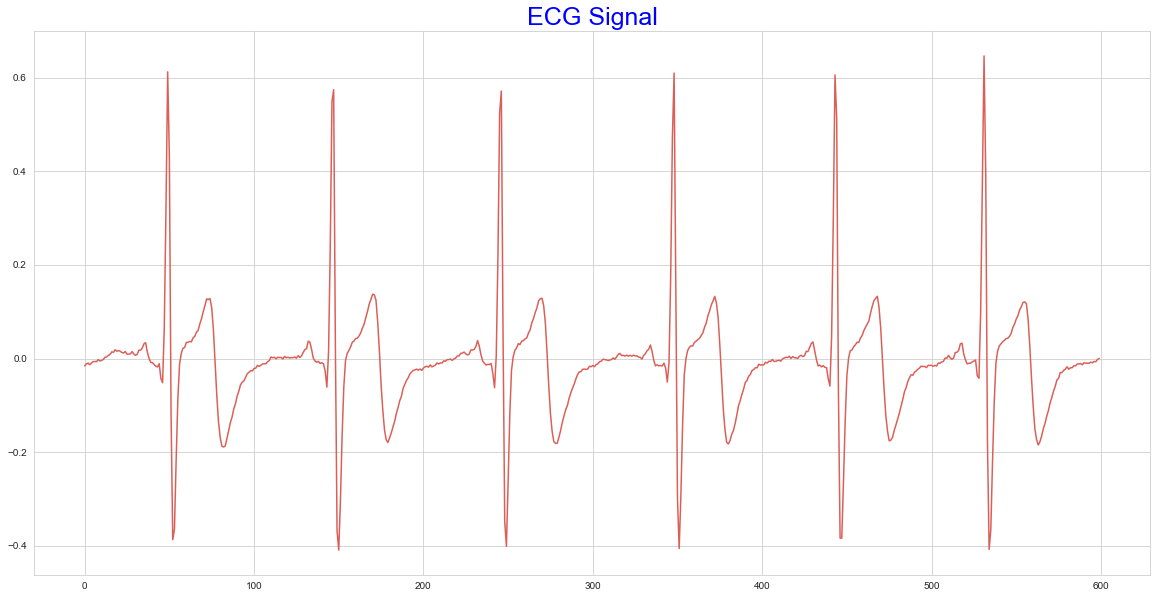

In [ ]:
# Download data
df = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit.py/master/examples/Bio/bio_100Hz.csv")

plt.title("ECG Signal",size=25,color='b')

plt.plot(df.ECG[:600])
plt.show()

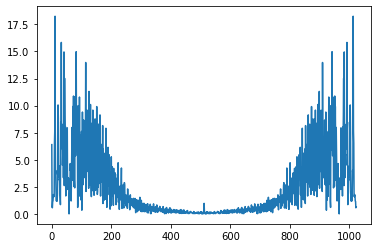

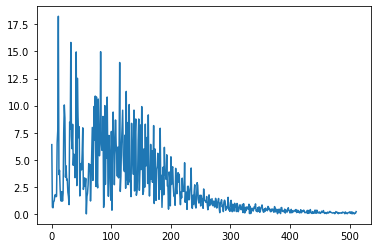

Text(0.5, 1.0, 'FFT of full signal')

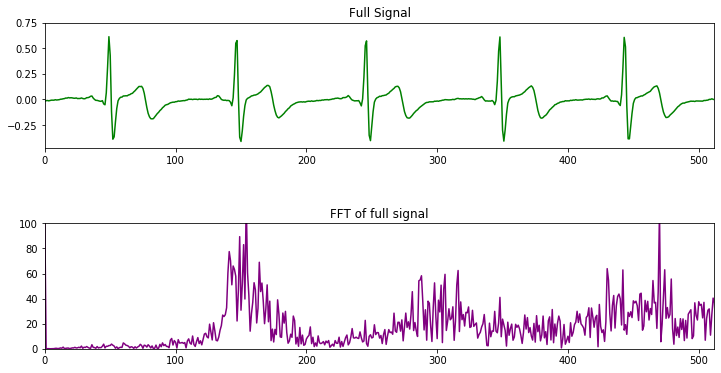

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from scipy.fftpack import fft

#Arr signal Fourier Transform

df = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit.py/master/examples/Bio/bio_100Hz.csv")
full_signal_fft_values = np.abs(fft(df.ECG))

#y = df.ECG[:500]
#nfft = len(y)
#nfft2 = 512
ff = np.abs(fft(df.ECG[:1000], 1024))
fff = ff[0:512]
plt.plot(np.abs(ff))
plt.show()

plt.plot(np.abs(fff))
plt.show()

x_values_fft = range(0, len(df.ECG), 1)

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, df.ECG, color = 'green')
full_signal.set_xlim(0, 512)
full_signal.set_title('Full Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
fft_comp.set_xlim(0, 512)
fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of full signal')

#fig.savefig('Figure_3.png')   # save the figure to file
#plt.close(fig)

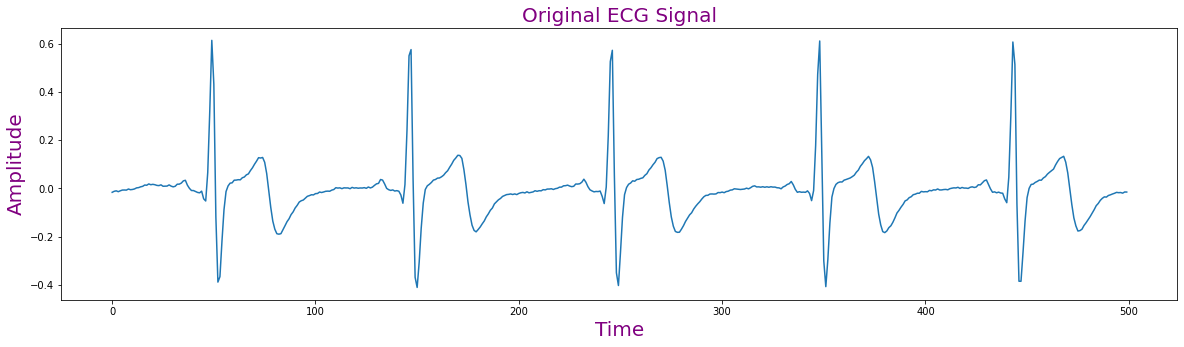

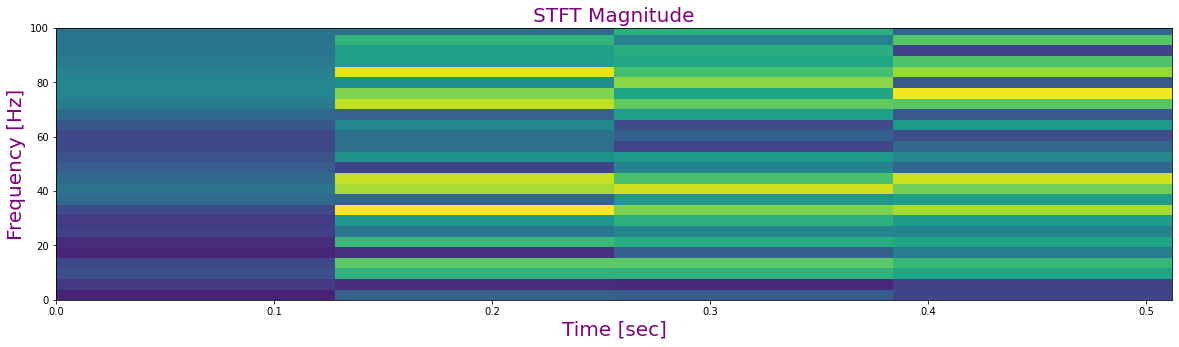

In [4]:
from scipy import signal
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 5.0]  # Bigger figures

fs = 1e3

df = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit.py/master/examples/Bio/bio_100Hz.csv")
f, t, Zxx = signal.stft(df.ECG[:500], fs)

plt.plot(df.ECG[:500])
plt.title("Original ECG Signal",size=20,color='purple')
plt.xlabel("Time",size=20,color='purple')
plt.ylabel("Amplitude",size=20,color='purple')
plt.show()

plt.pcolor(t, f, np.abs(Zxx[:500]))
plt.title('STFT Magnitude',size=20,color='purple')
plt.ylim(0,100)
plt.ylabel('Frequency [Hz]',size=20,color='purple')
plt.xlabel('Time [sec]',size=20,color='purple')
plt.show()

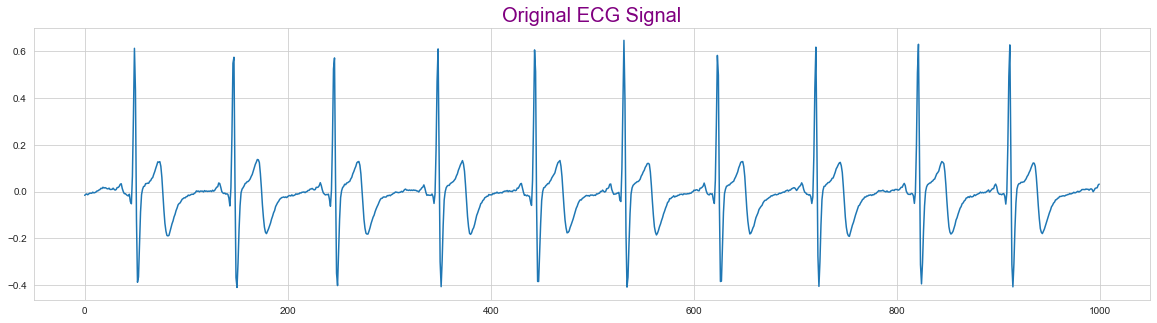

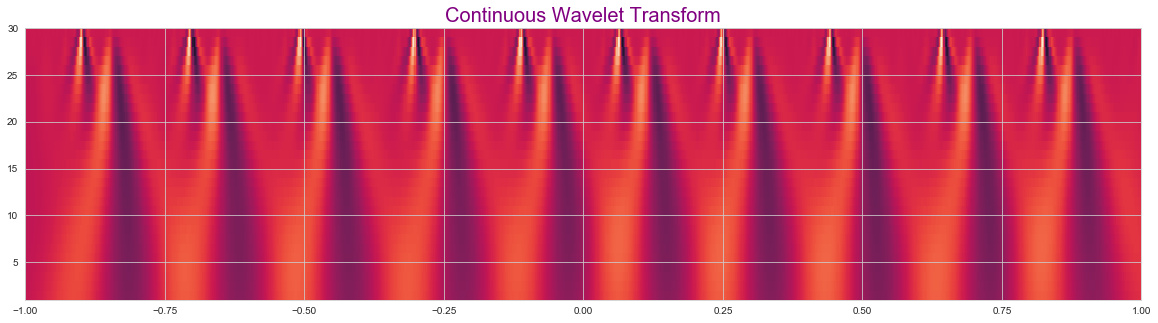

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 5.0]  # Bigger figures

t = np.linspace(-1, 1, 200, endpoint=False)
y = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit.py/master/examples/Bio/bio_100Hz.csv")
plt.plot(y.ECG[:1000])
plt.title("Original ECG Signal",size=20,color='purple')
plt.show()

widths = np.arange(1,30)
cwtmatr = signal.cwt(df.ECG[:1000], signal.ricker, widths)

plt.imshow(cwtmatr, extent=[-1, 1, 1, 30], aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title("Continuous Wavelet Transform",size=20,color='purple')
plt.show()